# Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

# Изучение и обработка данных

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import math
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

df=pd.read_csv('/datasets/rest_data.csv')

df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [ ]:
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()

In [ ]:
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'})
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
df['address'] = df['address'].str.replace('ё','е')


In [ ]:
df.isnull().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,сметана,несетевое,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,несетевое,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,несетевое,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,сетевое,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,несетевое,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,несетевое,столовая,"город москва, абрамцевская улица, дом 15, корп...",240
6,148815,брусника,сетевое,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,несетевое,столовая,"город москва, авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,несетевое,столовая,"город москва, авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,несетевое,столовая,"город москва, авиамоторная улица, дом 8, строе...",120


In [ ]:
df.drop(columns = ['id'],axis = 1).duplicated().sum()

85

In [ ]:
df.drop(columns = ['id'],axis = 1).isnull().sum()

object_name    0
chain          0
object_type    0
address        0
number         0
street_name    0
dtype: int64

<div class = "alert alert-info" >
<h3>Комментарий студента</h3>
    
Удалила стоблец один, и прогнала на дубликаты (их 85). Так как они не повлияют на результаты, то удалять их особого смысла нет, оставим как есть.
Пропусков при таком же прогоне - нет
    
</div>

# Анализ данных

## Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

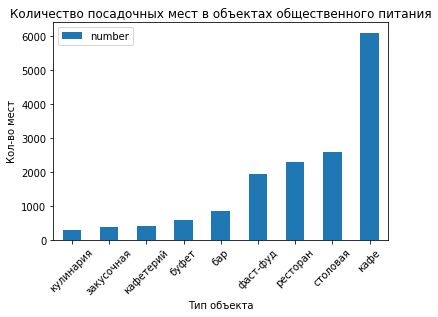

In [ ]:
df1 = df.groupby('object_type').count().reset_index()
ax = df1[['object_type', 'number']].set_index('object_type').sort_values('number', ascending=True).plot(kind='bar')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Кол-во мест')
ax.set_title('Количество посадочных мест в объектах общественного питания')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby('object_type')['object_name'].count().sort_values()

object_type
кулинария      273
закусочная     360
кафетерий      398
буфет          585
бар            856
фаст-фуд      1923
ресторан      2285
столовая      2587
кафе          6099
Name: object_name, dtype: int64

Вывод: больше всего кафе, столовых, ресторанов и фаст-фудов. Остальных - в разы меньше.

## Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [ ]:
df.groupby('chain')['object_name'].count().sort_values()

chain
сетевое       2968
несетевое    12398
Name: object_name, dtype: int64

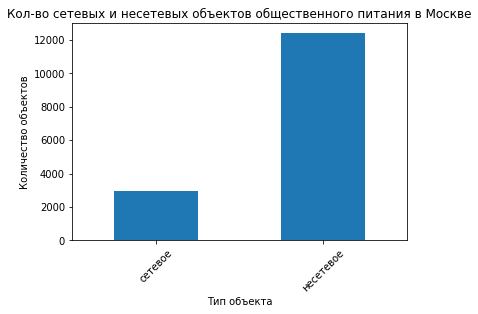

In [ ]:
ax = df.groupby('chain')['object_name'].count().sort_values().plot(kind='bar')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
ax.set_title('Кол-во сетевых и несетевых объектов общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

Вывод: несетевых объектов больше практически в 4 раза.

## Для какого вида объекта общественного питания характерно сетевое распространение?

In [ ]:
df2 = df.query('chain == "сетевое"')
df2

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,сетевое,кафе,"город москва, абрамцевская улица, дом 1",40
6,148815,брусника,сетевое,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
13,22579,алло пицца,сетевое,кафе,"город москва, улица авиаторов, дом 14",32
16,144107,суши wok,сетевое,фаст-фуд,"город москва, азовская улица, дом 3",7
18,58565,тануки,сетевое,ресторан,"город москва, большая академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,сетевое,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,сетевое,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,сетевое,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,сетевое,кафе,"город москва, поселение московский, киевское ш...",36


In [ ]:
df3 = df2.groupby('object_type')['object_name'].count().sort_values()
df3

object_type
столовая         3
буфет           11
бар             37
кафетерий       52
закусочная      56
кулинария       78
ресторан       544
фаст-фуд       791
кафе          1396
Name: object_name, dtype: int64

In [ ]:
df.groupby('object_type')['object_name'].count().sort_values()

object_type
кулинария      273
закусочная     360
кафетерий      398
буфет          585
бар            856
фаст-фуд      1923
ресторан      2285
столовая      2587
кафе          6099
Name: object_name, dtype: int64

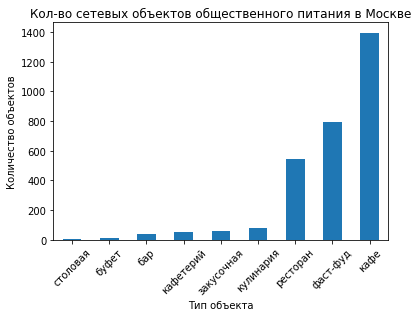

In [ ]:
ax = df2.groupby('object_type')['object_name'].count().sort_values().plot(kind='bar')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
ax.set_title('Кол-во сетевых объектов общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

Вывод: Наибольшее сетевое распространение в кафе. Если сопоставить график из п.1. и график из п.3. и данные заметим:

1) Наименьше сетевых - столовая (менее 1%)

2) Наибольше сетевых - фаст-фуд (41,1%), кулинария (более 28%), затем ресторан (23,8%), кафе (22,8%).

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

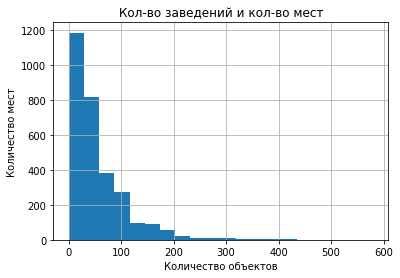

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

In [ ]:
ax = df2['number'].hist(bins=20)
ax.set_title('Кол-во заведений и кол-во мест')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Количество мест')
plt.show()
df2['number'].describe()

Text(0.5, 0, 'Кол-во мест')

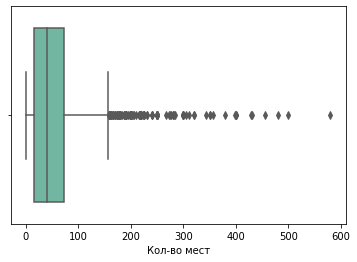

In [ ]:
ax = sns.boxplot(x=df2['number'], palette="Set2")
ax.set_xlabel('Кол-во мест')

Вывод: мест мало, заведений много.

## Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

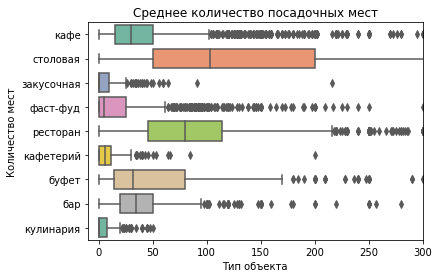

In [ ]:
ax = sns.boxplot(x='number', y='object_type', data=df, palette="Set2")
ax.set_xlim(-10,300)
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Cреднее количество посадочных мест')
plt.show()

In [ ]:
df.groupby('object_type')['number'].describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
кулинария,273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0
фаст-фуд,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0
кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0


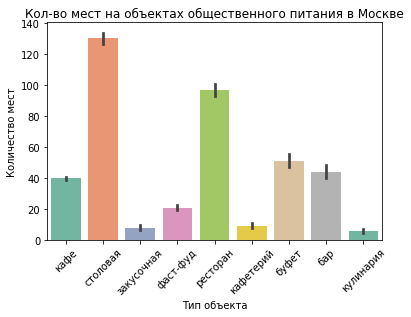

In [ ]:
ax = sns.barplot(x='object_type', y='number', data=df, palette="Set2")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Кол-во мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

Вывод: лучшие показатели у столовой и ресторана.

## Выделите в отдельный столбец информацию об улице из столбца address .

In [ ]:
symbols = [',', '«', '»', '(', ')', '"', '  ']
for s in symbols:
    df['object_name'] = df['object_name'].str.replace(s, ' ')
    df['address'] = df['address'].str.replace(s, ' ')

In [ ]:
streets = df['address'].to_list()
streets_only = []
for street in streets:  
    start = street.find('город москва')
    end = street.find('дом')
    streets_only.append(street[start+12:end-1])
df['street_name'] = streets_only
df.head(5)

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова
1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина
2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95,абельмановская улица
3,21894,пиццетория,сетевое,кафе,город москва абрамцевская улица дом 1,40,абрамцевская улица
4,119365,кафе вишневая метель,несетевое,кафе,город москва абрамцевская улица дом 9 корпус 1,50,абрамцевская улица


## Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [ ]:
df4 = df.groupby('street_name').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(df4['street_name'])
df4

,street_name,id,object_name,chain,object_type,address,number
0,проспект мира,204,204,204,204,204,204
1,профсоюзная улица,182,182,182,182,182,182
2,ленинградский проспект,170,170,170,170,170,170
3,пресненская набережная,167,167,167,167,167,167
4,варшавское шоссе,155,155,155,155,155,155
5,ленинский проспект,147,147,147,147,147,147
6,проспект вернадского,131,131,131,131,131,131
7,кутузовский проспект,114,114,114,114,114,114
8,каширское шоссе,103,103,103,103,103,103
9,ходынский бульвар,102,102,102,102,102,102


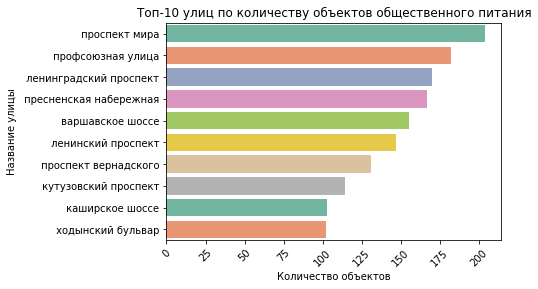

In [ ]:
ax = sns.barplot(x='object_type', y='street_name', data=df4, palette="Set2")
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.xticks(rotation=45)
plt.show()

1) Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино

2) Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево

3) Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский

4) Пресненская набережная: Пресненский

5) Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный

6) Ленинский проспект: Гагаринский, Донской

7) Проспект Вернадского: Проспект Вернадского

8) Кутузовский проспект: Дорогомилово, Фили-Давыдково

9) Каширское шоссе: Нагатино-Садовники, Нагорный

10) Ходынский бульвар: Хорошёвский

## Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [ ]:
df5 = df.groupby('street_name').count()
len(df5.query('id == 1'))

813

In [ ]:
df5 = df5.query('id == 1')
df5 = df5.reset_index()
df5.head(5)

,street_name,id,object_name,chain,object_type,address,number
0,1-й балтийский переулок,1,1,1,1,1,1
1,1-й басманный переулок,1,1,1,1,1,1
2,1-й ботанический проезд,1,1,1,1,1,1
3,1-й вешняковский проезд,1,1,1,1,1,1
4,1-й голутвинский переулок,1,1,1,1,1,1


## Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

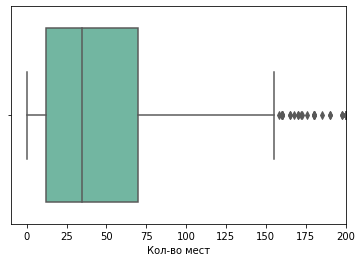

In [ ]:
df7 = df[df['street_name'].isin(top_10)]
ax = sns.boxplot(x=df7['number'], palette="Set2")
ax.set_xlabel('Кол-во мест')
ax.set_xlim(-10,200)
plt.show()

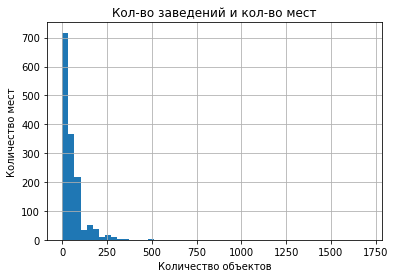

In [ ]:
ax = df7['number'].hist(bins=50)
ax.set_title('Кол-во заведений и кол-во мест')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Количество мест')
plt.show()

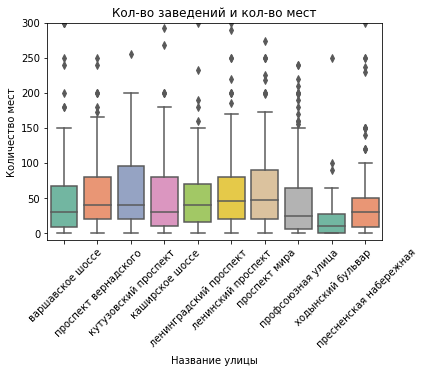

count    813.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: number, dtype: float64

In [ ]:
ax = sns.boxplot(x="street_name", y="number", data=df7, orient='v', palette="Set2")
ax.set_ylabel('Количество мест')
ax.set_title('Кол-во заведений и кол-во мест')
ax.set_xlabel('Название улицы')
plt.xticks(rotation=45)
ax.set_ylim(-10,300)
plt.show()
df5['number'].describe()

Вывод: метры - дорогие, мест - немного.

# Презентация

Презентация: https://docs.google.com/presentation/d/1WdQhzyMeLVaH4vz8hwqjQE7LmbTQIa1m/edit?usp=sharing&ouid=113249843605384895897&rtpof=true&sd=true

Презентация (pdf): https://drive.google.com/file/d/1gBbmBa4WBV4a0onnYUCD39RQEMYXmM7e/view?usp=sharing